In [33]:
import pandas as pd
import os
from enum import Enum
from typing import List

class MovieDataLoader:
    def __init__(self, file_path: str):
        self.file_path = file_path
        self.extension = os.path.splitext(file_path)[1]
        self.dataframe = None

    def load(self) -> pd.DataFrame:
        self.dataframe = pd.read_csv(
            self.file_path,
            sep='\t' if self.extension == '.txt' else ','
        )
        return self.dataframe

class DB(Enum):
    CASTINGS = 0
    COUNTRIES = 1
    GENRES = 2
    RATES = 3
    MOVIES = 4
    PEOPLES = 5

def get_dataframes() -> List[pd.DataFrame]:
    base_path = "../data/kmrd/kmr_dataset/datafile/kmrd-small"
    db_name = ["castings.csv", "countries.csv", "genres.csv", "rates.csv", "movies.txt", "peoples.txt"]
    db_paths = [os.path.join(base_path, name) for name in db_name]
    return [MovieDataLoader(path).load() for path in db_paths]

In [34]:
dataframes = get_dataframes()
castings_df = dataframes[DB.CASTINGS.value]
countries_df = dataframes[DB.COUNTRIES.value]
genres_df = dataframes[DB.GENRES.value]
rates_df = dataframes[DB.RATES.value]
movies_df = dataframes[DB.MOVIES.value]
peoples_df = dataframes[DB.PEOPLES.value]

print(castings_df.head())
print(countries_df.head())
print(genres_df.head())

   movie  people  order  leading
0  10001    4374      1        1
1  10001     178      2        1
2  10001    3241      3        1
3  10001   47952      4        1
4  10001   47953      5        0
   movie country
0  10001    이탈리아
1  10001     프랑스
2  10002      미국
3  10003      미국
4  10004      미국
   movie   genre
0  10001     드라마
1  10001  멜로/로맨스
2  10002      SF
3  10002     코미디
4  10003      SF


In [35]:
print(rates_df.head())
print(movies_df.head())
print(peoples_df.head())

   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340
   movie                 title                           title_eng    year  \
0  10001                시네마 천국              Cinema Paradiso , 1988  2013.0   
1  10002              빽 투 더 퓨쳐           Back To The Future , 1985  2015.0   
2  10003            빽 투 더 퓨쳐 2    Back To The Future Part 2 , 1989  2015.0   
3  10004            빽 투 더 퓨쳐 3  Back To The Future Part III , 1990  1990.0   
4  10005  스타워즈 에피소드 4 - 새로운 희망                    Star Wars , 1977  1997.0   

     grade  
0   전체 관람가  
1  12세 관람가  
2  12세 관람가  
3   전체 관람가  
4       PG  
   people    korean        original
0       5    아담 볼드윈    Adam Baldwin
1       8   애드리안 라인     Adrian Lyne
2       9     에이단 퀸     Aidan Quinn
3      13  구로사와 아키라  Akira Kurosawa
4      15     알 파치노       Al Pacino


### 결측치 (Missing Values)

결측치는 데이터셋에서 값이 누락된 경우를 의미합니다. 결측치는 여러 가지 이유로 발생할 수 있으며, 데이터 분석 및 머신러닝 모델링에 영향을 미칠 수 있습니다. 결측치를 처리하는 방법에는 여러 가지가 있으며, 대표적인 방법으로는 다음과 같습니다:

1. **삭제 (Deletion)**: 결측치가 포함된 행 또는 열을 삭제합니다. 결측치가 적은 경우에 유용하지만, 데이터 손실이 발생할 수 있습니다.
2. **대체 (Imputation)**: 결측치를 다른 값으로 대체합니다. 평균, 중앙값, 최빈값 또는 예측 모델을 사용하여 대체할 수 있습니다.
3. **예측 모델 사용 (Predictive Modeling)**: 결측치를 예측하는 모델을 만들어 대체합니다. 보다 정교한 방법이지만, 추가적인 계산 비용이 발생할 수 있습니다.
4. **특별한 값으로 대체 (Special Value)**: 결측치를 특별한 값 (예: -1, "Unknown")으로 대체합니다. 분석 목적에 따라 유용할 수 있습니다.

결측치를 적절히 처리하지 않으면 분석 결과의 신뢰성이 떨어질 수 있으므로, 데이터 전처리 단계에서 신중하게 다루어야 합니다.

### 이상치 (Outliers)

이상치는 데이터셋에서 다른 데이터 포인트와 현저히 다른 값을 의미합니다. 이상치는 여러 가지 이유로 발생할 수 있으며, 데이터 분석 및 머신러닝 모델링에 큰 영향을 미칠 수 있습니다. 이상치를 처리하는 방법에는 여러 가지가 있으며, 대표적인 방법으로는 다음과 같습니다:

1. **삭제 (Deletion)**: 이상치가 포함된 행을 삭제합니다. 이상치가 적은 경우에 유용하지만, 데이터 손실이 발생할 수 있습니다.
2. **대체 (Imputation)**: 이상치를 다른 값으로 대체합니다. 평균, 중앙값, 최빈값 또는 예측 모델을 사용하여 대체할 수 있습니다.
3. **변환 (Transformation)**: 로그 변환, 제곱근 변환 등을 사용하여 이상치의 영향을 줄입니다.
4. **모델링 기법 사용 (Robust Modeling)**: 이상치에 덜 민감한 모델링 기법을 사용합니다. 예를 들어, 로버스트 회귀, 트리 기반 모델 등을 사용할 수 있습니다.

이상치를 적절히 처리하지 않으면 분석 결과의 신뢰성이 떨어질 수 있으므로, 데이터 전처리 단계에서 신중하게 다루어야 합니다.

In [36]:
# 결측치 확인
def print_missing_values():
    print("결측치 확인:")
    print(movies_df.isnull().sum())
    print(castings_df.isnull().sum())
    print(countries_df.isnull().sum())
    print(genres_df.isnull().sum())
    print(rates_df.isnull().sum())
    print(peoples_df.isnull().sum())

def remove_missing_values():
    movies_df['year'] = pd.to_numeric(movies_df['year'], errors='coerce')
    movies_df['grade'] = pd.to_numeric(movies_df['grade'], errors='coerce')

    year_median = movies_df['year'].median() if not movies_df['year'].isna().all() else 0
    grade_median = movies_df['grade'].median() if not movies_df['grade'].isna().all() else 0

    # Fill missing values
    movies_df.fillna({
        'title': 'Unknown',
        'title_eng': 'Unknown',
        'year': year_median,
        'grade': grade_median
    }, inplace=True)

    peoples_df.fillna({
        'original': 'Unknown'
    }, inplace=True)

print_missing_values()

결측치 확인:
movie          0
title          7
title_eng      8
year         390
grade         42
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64
people        0
korean        0
original    867
dtype: int64


In [37]:
remove_missing_values()
print_missing_values()

결측치 확인:
movie        0
title        0
title_eng    0
year         0
grade        0
dtype: int64
movie      0
people     0
order      0
leading    0
dtype: int64
movie      0
country    0
dtype: int64
movie    0
genre    0
dtype: int64
user     0
movie    0
rate     0
time     0
dtype: int64
people      0
korean      0
original    0
dtype: int64


In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# D2Coding 폰트 경로 설정
font_path = "../D2Coding.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rc("font", family=fontprop.get_name())
plt.rcParams.update({"font.size": 14})  # Set the font size to 14
plt.figure(figsize=(19, 10))


<Figure size 1900x1000 with 0 Axes>

<Figure size 1900x1000 with 0 Axes>

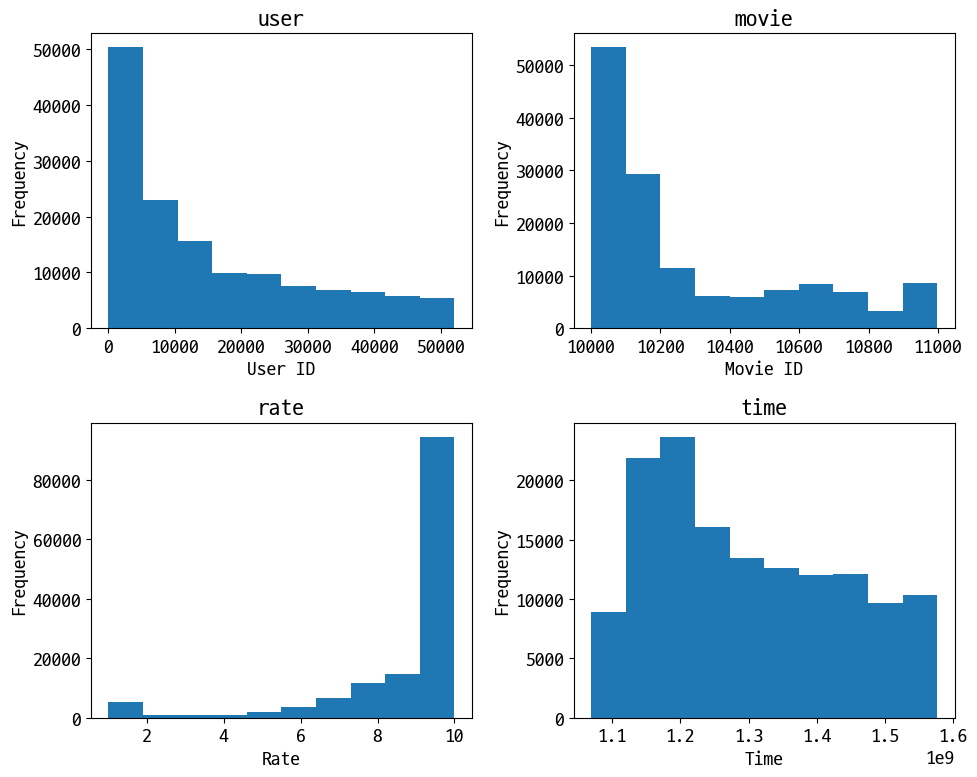

In [39]:
# 2x2 그리드 생성, 10x8 사이즈로 설정
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# user 히스토그램, bins: 막대수
axs[0, 0].set_title('user')
axs[0, 0].hist(rates_df['user'], bins=10)
axs[0, 0].set_xlabel('User ID')
axs[0, 0].set_ylabel('Frequency')

# movie 히스토그램
axs[0, 1].set_title('movie')
axs[0, 1].hist(rates_df['movie'], bins=10)
axs[0, 1].set_xlabel('Movie ID')
axs[0, 1].set_ylabel('Frequency')

# rate 히스토그램
axs[1, 0].set_title('rate')
axs[1, 0].hist(rates_df['rate'], bins=10)
axs[1, 0].set_xlabel('Rate')
axs[1, 0].set_ylabel('Frequency')

# time 히스토그램
axs[1, 1].set_title('time')
axs[1, 1].hist(rates_df['time'], bins=10)
axs[1, 1].set_xlabel('Time')
axs[1, 1].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()
plt.show()

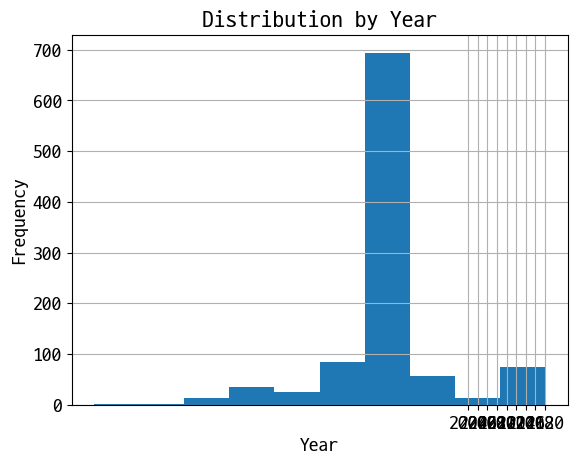

In [40]:
# rates_df의 'time' 컬럼을 초 단위로 변환하여 datetime 형식으로 변환 후 연도 추출
# rates_df['year'] = pd.to_datetime(rates_df['time'], unit='s').dt.year


# 연도별 히스토그램
plt.hist(movies_df['year'], bins=10)
plt.title('Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Set x-axis ticks
plt.xticks(range(2004, 2022, 2))
# Add grid
plt.grid(True)

plt.show()

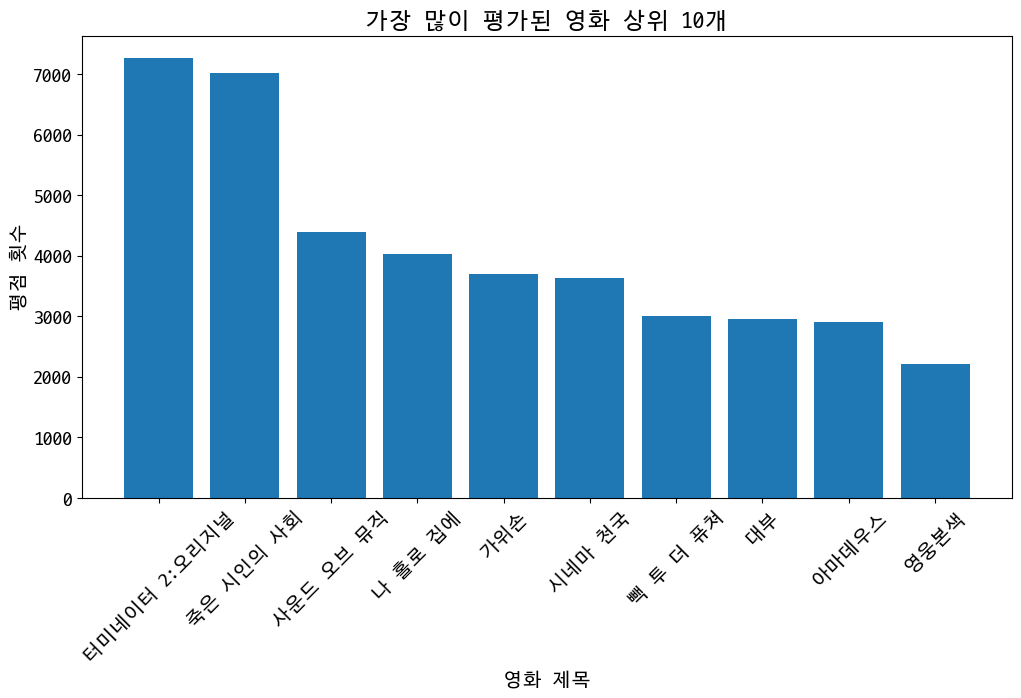

In [41]:
# 영화별 평점 횟수 계산
movie_rating_counts = rates_df['movie'].value_counts().head(10)

# 영화 제목과 평점 횟수 병합
top_movies = movies_df[movies_df['movie'].isin(movie_rating_counts.index)]
top_movies = top_movies.set_index('movie').loc[movie_rating_counts.index]
top_movies['rating_count'] = movie_rating_counts.values

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_movies['title'], top_movies['rating_count'])
plt.xlabel('영화 제목')
plt.ylabel('평점 횟수')
plt.title('가장 많이 평가된 영화 상위 10개')
plt.xticks(rotation=45)
plt.show()

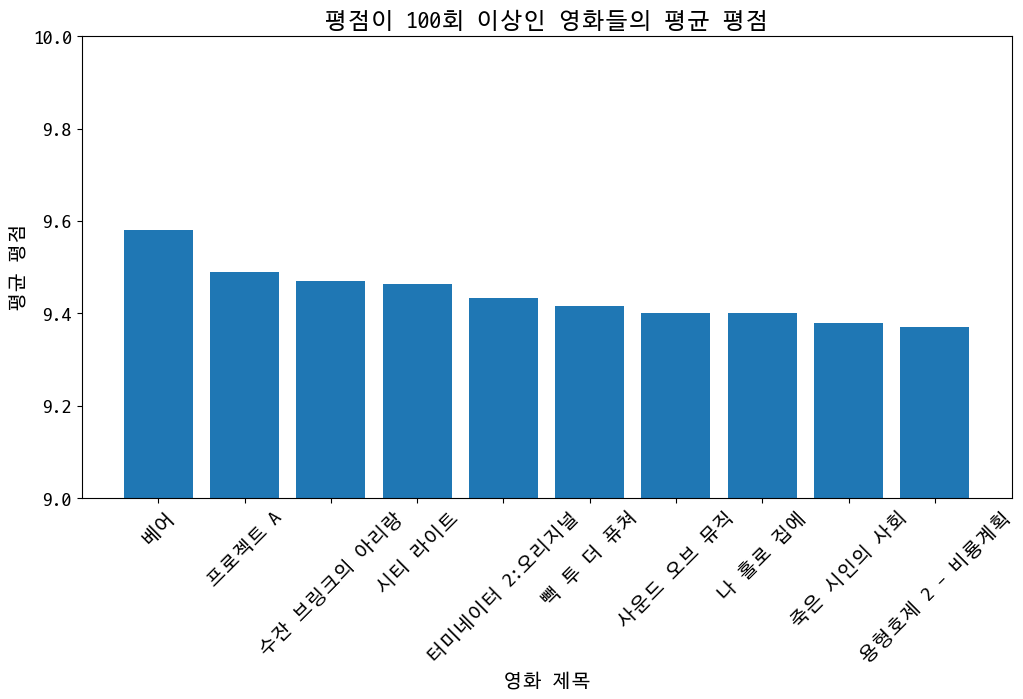

In [42]:
# 영화별 평점 계산
movie_ratings = rates_df.groupby('movie')['rate'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# 평점이 매겨진 횟수가 100회 이상인 영화 필터링
filtered_movie_ratings = movie_ratings[movie_ratings['count'] >= 100].head(10)

# 영화 제목과 평균 평점 병합
top_movies = movies_df[movies_df['movie'].isin(filtered_movie_ratings.index)]
top_movies = top_movies.set_index('movie').loc[filtered_movie_ratings.index]
top_movies['avg_rating'] = filtered_movie_ratings['mean']

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_movies['title'], top_movies['avg_rating'])
plt.xlabel('영화 제목')
plt.ylabel('평균 평점')
plt.title('평점이 100회 이상인 영화들의 평균 평점')
plt.ylim(int(filtered_movie_ratings['mean'].min()), 10)  # y축의 시작점과 끝점 설정
plt.xticks(rotation=45)
plt.show()

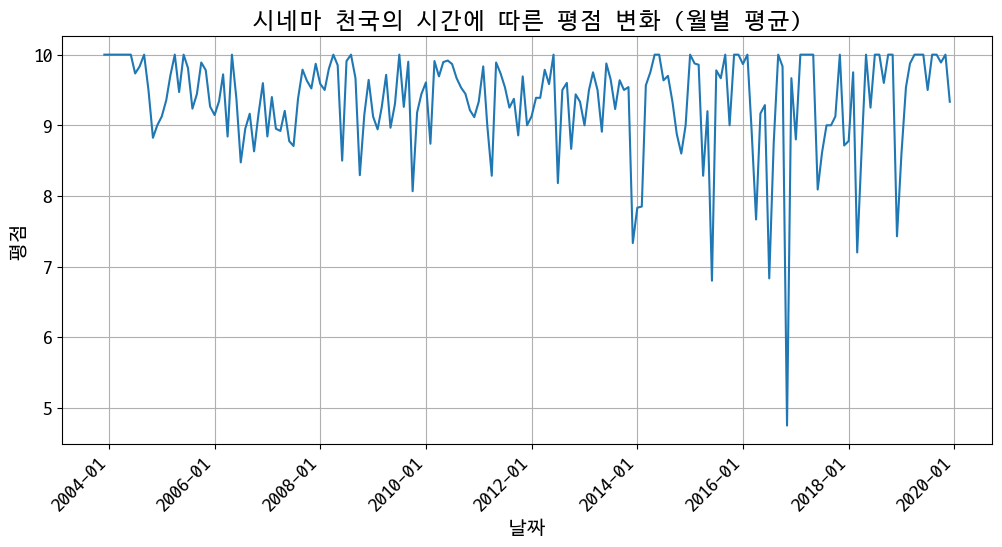

In [43]:
import matplotlib.dates as dates

# 특정 영화 ID 설정 (예: 10001)
movie_id = 10001

# 특정 영화의 평점 데이터 필터링
movie_ratings = rates_df[rates_df['movie'] == movie_id].copy()

# 타임스탬프를 날짜로 변환
movie_ratings.loc[:, 'date'] = pd.to_datetime(movie_ratings['time'], unit='s')

# 월별 평균 평점 계산
movie_ratings.loc[:, 'month'] = movie_ratings['date'].dt.to_period('M')
monthly_avg_ratings = movie_ratings.groupby('month')['rate'].mean()

# 영화 제목 가져오기
movie_title = movies_df[movies_df['movie'] == movie_id]['title'].values[0]

# 시각화
plt.figure(figsize=(12, 6))
monthly_avg_ratings.plot(x_compat=True)
plt.xlabel('날짜')
plt.ylabel('평점')
plt.title(f'{movie_title}의 시간에 따른 평점 변화 (월별 평균)')
plt.xticks(rotation=45)
plt.grid(True)

# x축 포맷 설정
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%Y-%m'))
plt.show()